In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading of Data


In [5]:
df1=pd.read_csv("Blood Pressure.csv")
df1.head()

,Name,Age,Gender,Medication,BloodPressure
0,Olivia Smith,56,Female,0,118.709076
1,Emily Smith,69,Female,0,122.304778
2,William Brown,46,Male,0,113.253050
3,Olivia Johnson,32,Female,0,114.904636
4,Samantha Johnson,60,Female,0,120.635061


In [23]:
df1.describe(include='all')

,Name,Age,Gender,Medication,BloodPressure
count,120,120.000000,120,120.000000,120.000000
unique,47,NaN,2,NaN,NaN
top,John Jones,NaN,Male,NaN,NaN
freq,6,NaN,69,NaN,NaN
mean,NaN,50.391667,NaN,1.500000,119.868316
std,NaN,19.089922,NaN,1.122722,5.250707
min,NaN,19.000000,NaN,0.000000,105.602716
25%,NaN,33.750000,NaN,0.750000,116.152301
50%,NaN,51.500000,NaN,1.500000,119.959249
75%,NaN,68.000000,NaN,2.250000,123.437108


In [7]:
df1.nunique()

Name              47
Age               55
Gender             2
Medication         4
BloodPressure    120
dtype: int64

In [16]:
df1.duplicated().sum()

0


# 2. Univariate Analysis
# Histogram of columns


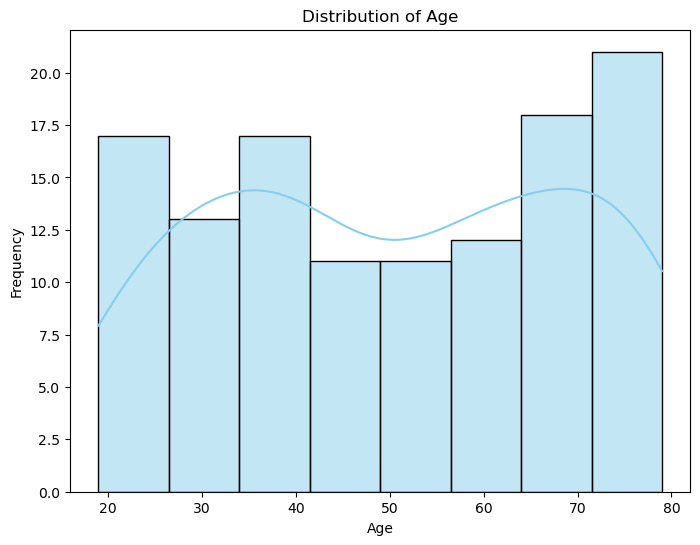

In [19]:
# Check the distribution visually
plt.figure(figsize=(8, 6))
sns.histplot(df1['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


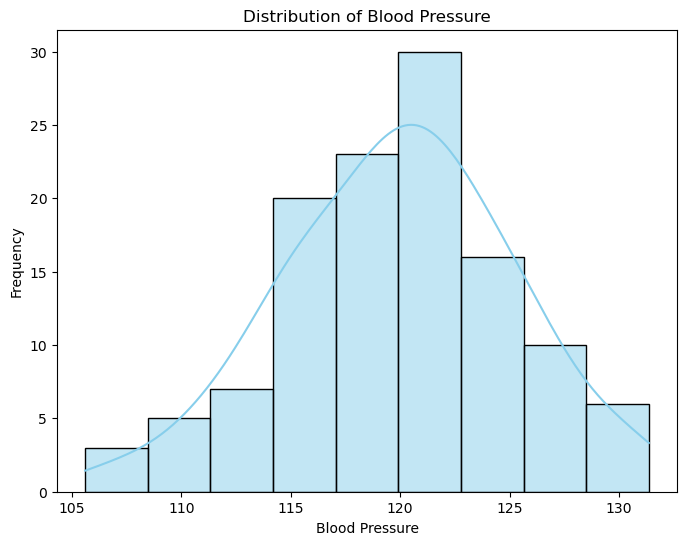

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['BloodPressure'], kde=True, color='skyblue')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

Normality Testing

In [9]:
skewness = stats.skew(df1['BloodPressure'])
kurtosis = stats.kurtosis(df1['BloodPressure'])
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)


Skewness: -0.17629202968540122
Kurtosis: -0.16435524578493865


In [10]:
shapiro_test = stats.shapiro(df1['BloodPressure'])
print("\nShapiro-Wilk Test for Normality:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)


Shapiro-Wilk Test for Normality:
Test Statistic: 0.9933999180793762
p-value: 0.8454365730285645


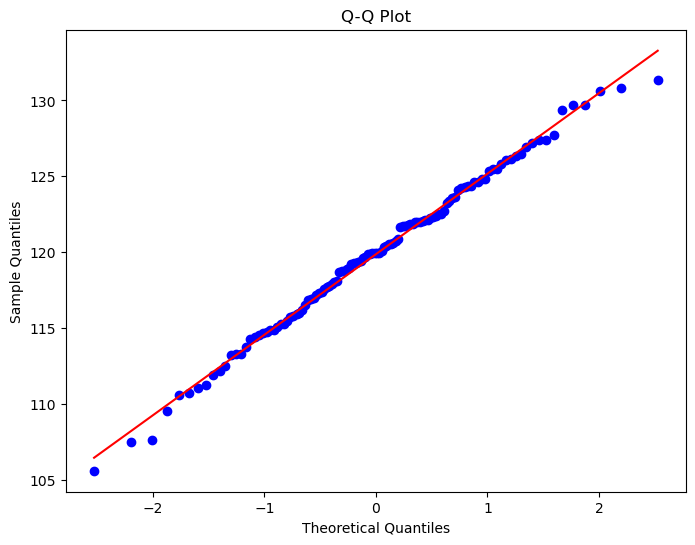

In [43]:
# QQ plot for normality
plt.figure(figsize=(8, 6))
stats.probplot(df1['BloodPressure'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [44]:
# From the test and Graph analysis the distribution is normally distributed

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


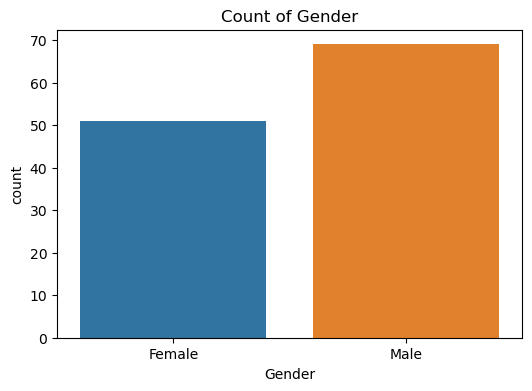

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(df1['Gender'])
plt.title('Count of Gender')
plt.show()

# Bivariate analysis

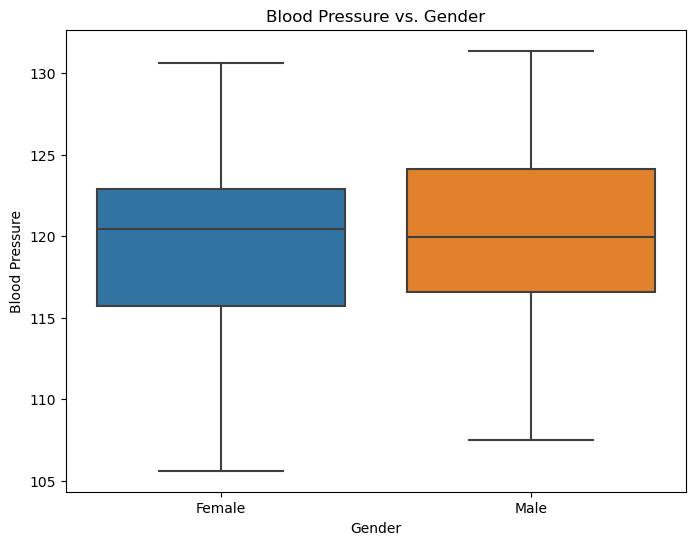

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BloodPressure', data=df1)
plt.title('Blood Pressure vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()

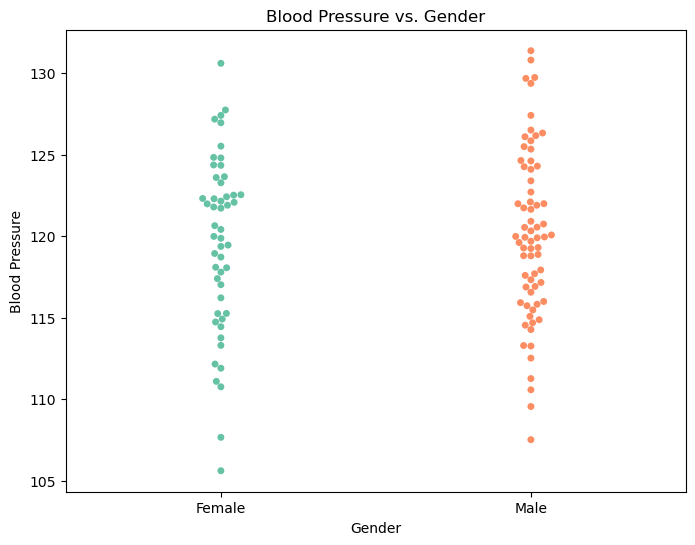

In [23]:
# Bivariate analysis: Blood Pressure vs. Gender using swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Gender', y='BloodPressure', data=df1, palette='Set2')
plt.title('Blood Pressure vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()


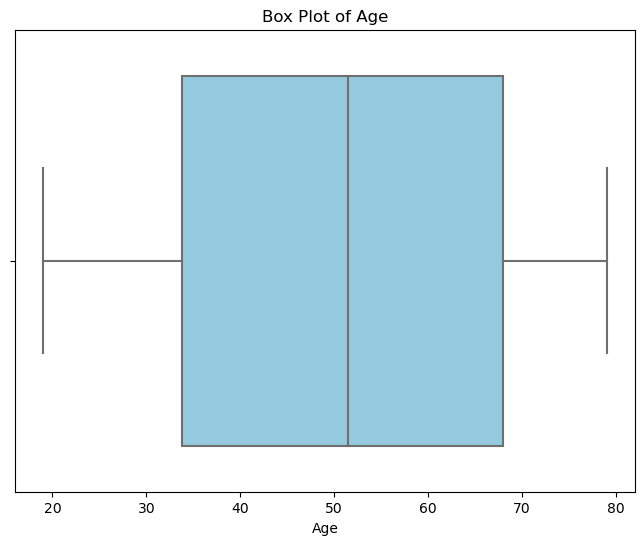

In [51]:
# Box plot for age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df1, color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


# Hypothesis Testing using ANOVA
Null Hypothesis (H0): The mean blood pressure is the same across all medication groups.\
Alternative Hypothesis (H1): At least one medication group has a different mean blood pressure from the others

In [12]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BloodPressure ~ Medication', data=df1).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("\nOne-Way ANOVA Results:")
print(anova_table)


One-Way ANOVA Results:
                 sum_sq     df         F    PR(>F)
Medication     6.760910    1.0  0.243669  0.622486
Residual    3274.060099  118.0       NaN       NaN


In [24]:
alpha = 0.05

if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis (H0).")
    print("There is a significant difference in the mean blood pressure levels among different medication groups.")
else:
    print("Fail to reject the null hypothesis (H0).")
    print("There is no significant difference in the mean blood pressure levels among different medication groups.")


Fail to reject the null hypothesis (H0).
There is no significant difference in the mean blood pressure levels among different medication groups.


In [31]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BloodPressure ~ Gender', data=df1).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("\nOne-Way ANOVA Results:")
print(anova_table)


One-Way ANOVA Results:
               sum_sq     df         F    PR(>F)
Gender       5.698126    1.0  0.205299  0.651309
Residual  3275.122883  118.0       NaN       NaN


In [33]:

alpha = 0.05

if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis (H0).")
    print("There is a significant difference in the mean blood pressure levels between genders.")
else:
    print("Fail to reject the null hypothesis (H0).")
    print("There is no significant difference in the mean blood pressure levels between genders.")


Fail to reject the null hypothesis (H0).
There is no significant difference in the mean blood pressure levels between genders.


In [34]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BloodPressure ~ Age', data=df1).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print("\nOne-Way ANOVA Results:")
print(anova_table)


One-Way ANOVA Results:
               sum_sq     df         F    PR(>F)
Age         16.995189    1.0  0.614442  0.434691
Residual  3263.825820  118.0       NaN       NaN


In [36]:
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis (H0).")
    print("There is a significant difference in the mean blood pressure levels among different age groups.")
else:
    print("Fail to reject the null hypothesis (H0).")
    print("There is no significant difference in the mean blood pressure levels among different age groups.")


Fail to reject the null hypothesis (H0).
There is no significant difference in the mean blood pressure levels among different age groups.
